### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

In [20]:
# Imprimir el ingreso de cada tienda
print(f"Ingreso total de Tienda 1: {ingreso_tienda1:,.0f}".replace(",", "."))
print(f"Ingreso total de Tienda 2: {ingreso_tienda2:,.0f}".replace(",", "."))
print(f"Ingreso total de Tienda 3: {ingreso_tienda3:,.0f}".replace(",", "."))
print(f"Ingreso total de Tienda 4: {ingreso_tienda4:,.0f}".replace(",", "."))

if (ingreso_tienda1 > ingreso_tienda2 and ingreso_tienda1 > ingreso_tienda3 and ingreso_tienda1 > ingreso_tienda4):
  print("La tienda con mayor ingresos es la tienda 1, con un total de:", f"${ingreso_tienda1:,.0f}".replace(",", "."))



Ingreso total de Tienda 1: 1.150.880.400
Ingreso total de Tienda 2: 1.116.343.500
Ingreso total de Tienda 3: 1.098.019.600
Ingreso total de Tienda 4: 1.038.375.700
La tienda con mayor ingresos es la tienda 1, con un total de: $1.150.880.400


In [21]:
# Calcular el ingreso total combinado de todas las tiendas usando una suma de lista
ingresos_por_tienda = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
ingreso_total_combinado = sum(ingresos_por_tienda)

print(f"\nIngreso total combinado de todas las tiendas: {ingreso_total_combinado:,.0f}")


Ingreso total combinado de todas las tiendas: 4,403,619,200


# 2. Ventas por categoría

In [26]:
# Crear un diccionario para almacenar los DataFrames y procesarlos en un bucle
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

print("Cantidad de productos vendidos por categoría en cada tienda:\n")

for nombre_tienda, df in tiendas.items():
    print(f"--- {nombre_tienda} ---")

    # Agrupar por 'Categoría de Producto' y contar el número de ocurrencias
    # value_counts() ya ordena por defecto de mayor a menor frecuencia
    if 'Categoría del Producto' in df.columns:
        ventas_por_categoria = df['Categoría del Producto'].value_counts()
        print(ventas_por_categoria)

        # Mostrar la categoría más popular
        if not ventas_por_categoria.empty:
            categoria_mas_popular = ventas_por_categoria.index[0]
            cantidad_mas_popular = ventas_por_categoria.iloc[0]
            print(f"La categoría más popular es: '{categoria_mas_popular}' con {cantidad_mas_popular} ventas.\n")
        else:
            print("No hay ventas registradas o categorías en esta tienda.\n")
    else:
        print("La columna 'Categoría de Producto' no se encuentra en este conjunto de datos.\n")

Cantidad de productos vendidos por categoría en cada tienda:

--- Tienda 1 ---
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
La categoría más popular es: 'Muebles' con 465 ventas.

--- Tienda 2 ---
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
La categoría más popular es: 'Muebles' con 442 ventas.

--- Tienda 3 ---
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Lib

In [24]:
#Productos Vendidos en Tienda
cantidad_productos_tienda1 = tienda['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 1 es: {cantidad_productos_tienda1:,}')

cantidad_productos_tienda2 = tienda2['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 2 es: {cantidad_productos_tienda2:,}')

cantidad_productos_tienda3 = tienda3['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 3 es: {cantidad_productos_tienda3:,}')

cantidad_productos_tienda4 = tienda4['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 4 es: {cantidad_productos_tienda4:,}')


La cantidad de productos vendidos en la tienda 1 es: 2,359
La cantidad de productos vendidos en la tienda 2 es: 2,359
La cantidad de productos vendidos en la tienda 3 es: 2,359
La cantidad de productos vendidos en la tienda 4 es: 2,358


# 3. Calificación promedio de la tienda


In [28]:
calific_1=tienda['Calificación'].mean()
calific_2=tienda2['Calificación'].mean()
calific_3=tienda3['Calificación'].mean()
calific_4=tienda4['Calificación'].mean()
print(f"La Califiación de la Tienda 1 es: {calific_1:.2f} ★")
print(f"La Califiación de la Tienda 2 es: {calific_2:.2f} ★")
print(f"La Califiación de la Tienda 3 es: {calific_3:.2f} ★")
print(f"La Califiación de la Tienda 4 es: {calific_4:.2f} ★")


La Califiación de la Tienda 1 es: 3.98 ★
La Califiación de la Tienda 2 es: 4.04 ★
La Califiación de la Tienda 3 es: 4.05 ★
La Califiación de la Tienda 4 es: 4.00 ★


# 4. Productos más y menos vendidos

In [31]:
#TIENDA 1
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda 1: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda 1: 1,150,880,400

                  Top 10 Más Caros                       Top 10 Más Baratos
0      TV LED UHD 4K - 142,150,200             Cuerda para saltar - 652,800
1       Refrigerador - 112,143,300                 Dinosaurio Rex - 688,900
2           Iphone 15 - 97,902,200                Cubo mágico 8x8 - 696,900
3            Smart TV - 67,452,100                 Set de vasos - 1,359,100
4    Lavadora de ropa - 65,783,600            Ajedrez de madera - 1,430,600
5        Lavavajillas - 62,054,900      Dashboards con Power BI - 1,455,700
6    Secadora de ropa - 59,062,400      Bloques de construcción - 1,865,700
7         Tablet ABXY - 47,639,800                  Muñeca bebé - 1,937,300
8             Batería - 37,693,900  Ciencia de datos con Python - 2,063,600
9  Guitarra eléctrica - 37,292,200    Iniciando en programación - 2,093,100


In [32]:
#TIENDA 2
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda2.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda N°2: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda N°2: 1,116,343,500

                Top 10 Más Caros                   Top 10 Más Baratos
0        Iphone 15 - 113,225,800            Cubo mágico 8x8 - 643,600
1    TV LED UHD 4K - 103,375,000             Dinosaurio Rex - 770,300
2      Refrigerador - 97,632,500         Cuerda para saltar - 856,900
3  Lavadora de ropa - 66,762,300        Ajedrez de madera - 1,287,700
4          Smart TV - 61,142,000             Set de vasos - 1,542,600
5  Secadora de ropa - 59,115,100  Dashboards con Power BI - 1,599,500
6      Lavavajillas - 58,767,500               Cubertería - 1,732,900
7       Tablet ABXY - 56,209,800  Bloques de construcción - 1,789,400
8           Batería - 46,175,300      Balón de baloncesto - 2,091,300
9      Celular ABXY - 41,668,900             Vaso térmico - 2,155,900


In [34]:
#TIENDA 3
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda3.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda 3: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda 3: 1,098,019,600

                Top 10 Más Caros                   Top 10 Más Baratos
0      Refrigerador - 99,889,700            Cubo mágico 8x8 - 640,400
1     TV LED UHD 4K - 96,669,100             Dinosaurio Rex - 795,600
2         Iphone 15 - 93,225,700         Cuerda para saltar - 853,800
3          Smart TV - 78,837,300             Set de vasos - 1,210,700
4      Lavavajillas - 64,364,800  Bloques de construcción - 1,237,200
5       Tablet ABXY - 58,440,100        Ajedrez de madera - 1,355,300
6  Lavadora de ropa - 57,459,100  Dashboards con Power BI - 1,372,600
7  Secadora de ropa - 49,798,300             Vaso térmico - 1,725,600
8      Celular ABXY - 43,419,600               Cubertería - 1,775,900
9         Cama king - 38,834,700              Muñeca bebé - 1,932,600


In [35]:
#TIENDA 4
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda4.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda 4: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda 4: 1,038,375,700

                Top 10 Más Caros                       Top 10 Más Baratos
0         Iphone 15 - 96,697,500             Cuerda para saltar - 704,800
1     TV LED UHD 4K - 90,295,300                Cubo mágico 8x8 - 748,400
2          Smart TV - 82,790,400                 Dinosaurio Rex - 858,100
3      Refrigerador - 75,271,900            Ajedrez de madera - 1,075,500
4       Tablet ABXY - 56,723,100                 Set de vasos - 1,471,800
5      Lavavajillas - 55,349,300      Bloques de construcción - 1,909,800
6  Lavadora de ropa - 52,463,600      Dashboards con Power BI - 1,990,600
7  Secadora de ropa - 42,262,200  Ciencia de datos con Python - 2,108,800
8      Celular ABXY - 40,171,600    Iniciando en programación - 2,118,200
9         Cama king - 37,555,400                 Vaso térmico - 2,152,500


# 5. Envío promedio por tienda

In [51]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
envio_prom1=tienda['Costo de envío'].mean()
envio_prom2=tienda2['Costo de envío'].mean()
envio_prom3=tienda3['Costo de envío'].mean()
envio_prom4=tienda4['Costo de envío'].mean()
print(f"El Envío promedio de la Tienda N°1 es: {envio_prom1:,.2f}")
print(f"El Envío promedio de la Tienda N°2 es: {envio_prom2:,.2f}")
print(f"El Envío promedio de la Tienda N°3 es: {envio_prom3:,.2f}")
print(f"El Envío promedio de la Tienda N°4 es: {envio_prom4:,.2f}")


El Envío promedio de la Tienda N°1 es: 26,018.61
El Envío promedio de la Tienda N°2 es: 25,216.24
El Envío promedio de la Tienda N°3 es: 24,805.68
El Envío promedio de la Tienda N°4 es: 23,459.46


# 6. Gráficos

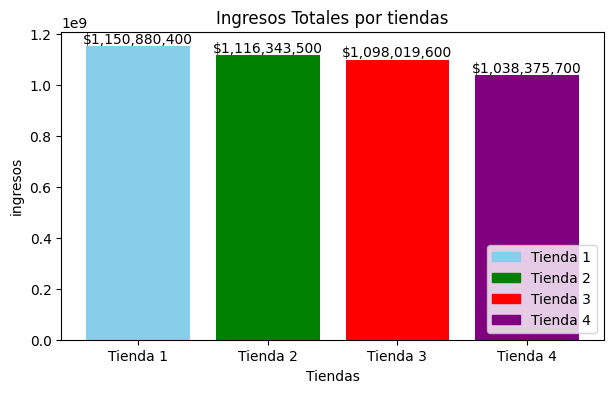

In [39]:

import matplotlib.pyplot as plt
#Datos de facturación
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
colores = ['skyblue', 'green', 'red', 'purple']

#creando gráfico de barras
plt.figure(figsize=(7, 4))#tamaño gráfico
plt.bar(tiendas, ingresos, color=['skyblue','green','red','purple'])

#agregando valores sobre cada barra
for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso, f'${ingreso:,.0f}', ha='center', va='bottom')
#ejes gráfico
plt.xlabel('Tiendas')
plt.ylabel('ingresos')
plt.title('Ingresos Totales por tiendas')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colores], labels=tiendas, loc='lower right')
plt.show()

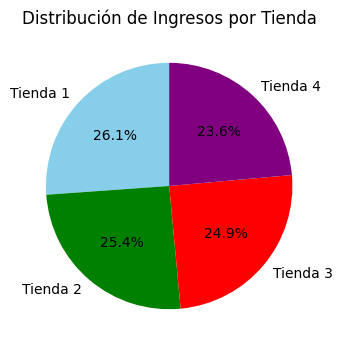

In [41]:
import matplotlib.pyplot as plt
# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
colores = ['skyblue', 'green', 'red', 'purple']

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', colors=colores, startangle=90)

# Título
plt.title('Distribución de Ingresos por Tienda')

# Mostrar el gráfico
plt.show()

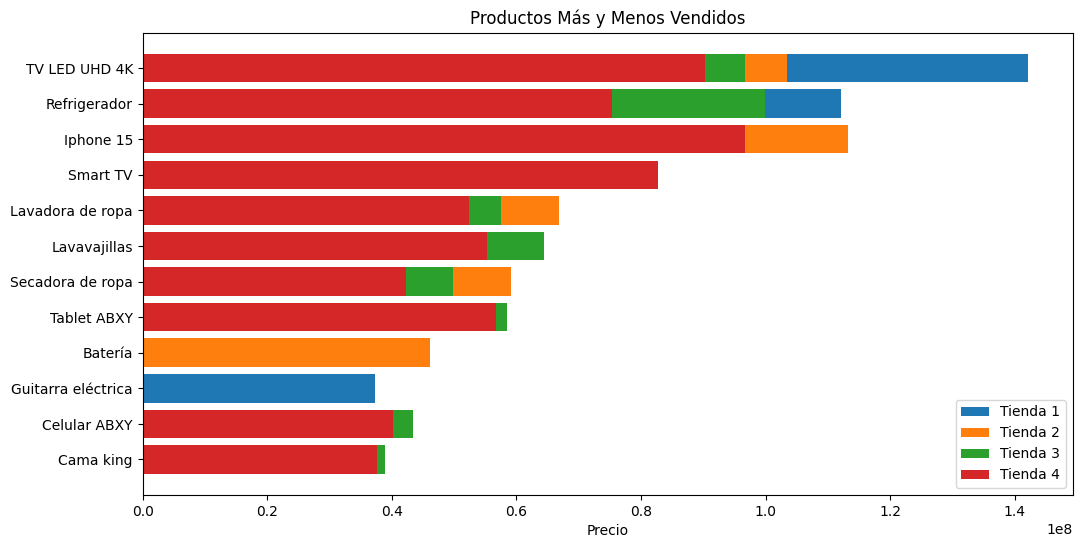

In [42]:
import matplotlib.pyplot as plt

# Concatenar datos de todas las tiendas
df_tiendas = pd.concat([tienda.assign(Tienda='Tienda 1'),
                        tienda2.assign(Tienda='Tienda 2'),
                        tienda3.assign(Tienda='Tienda 3'),
                        tienda4.assign(Tienda='Tienda 4')])

# Agrupar y calcular precios por tienda y producto
productos_ordenados = df_tiendas.groupby(['Tienda', 'Producto'])['Precio'].sum().reset_index()

# Extraer los 10 productos más caros por tienda
top_10_por_tienda = productos_ordenados.sort_values(['Tienda', 'Precio'], ascending=[True, False]).groupby('Tienda').head(10)

# Crear gráfico
plt.figure(figsize=(12, 6))
for tienda in top_10_por_tienda['Tienda'].unique():
    subset = top_10_por_tienda[top_10_por_tienda['Tienda'] == tienda]
    plt.barh(subset['Producto'], subset['Precio'], label=tienda)

plt.xlabel('Precio')
plt.title('Productos Más y Menos Vendidos')
plt.legend()
plt.gca().invert_yaxis()  # Invertir eje Y para mejor legibilidad
plt.show()

# Reporte Final

El Sr. Juan ha solicitado una evaluación exhaustiva de las cuatro sucursales de su cadena, Alura Store, con el fin de determinar cuál de ellas debería ser desinvertida para financiar un nuevo proyecto empresarial.

Para cumplir con este requerimiento, se procederá a un análisis detallado de los datos de ventas, el rendimiento operativo y las reseñas de clientes correspondientes a cada una de las cuatro tiendas.

El propósito fundamental de este estudio es identificar la sucursal con el rendimiento más bajo o la menor eficiencia, y posteriormente formular una recomendación fundamentada en los hallazgos derivados del análisis de los datos. Inicialmente, este análisis se centrará en la evaluación de los ingresos generados por cada una de las cuatro tiendas.

## Sección de Análisis de Ingresos por Tienda

El análisis detallado de los ingresos obtenidos por cada una de nuestras tiendas revela la siguiente distribución:

*   Tienda 1: 1.150.880.400
*   Tienda 2: 1.116.343.500
*   Tienda 3: 1.098.019.600
*   Tienda 4: 1.038.375.700

En base a estos datos, se concluye que la Tienda 1 ha generado los mayores ingresos en el periodo analizado, alcanzando un total de 1.150.880.400. Este resultado la posiciona como la sucursal con el mejor desempeño económico.

## Sección de Análisis de Cantidades de Productos más vendidos por Tienda
A continuación, se presenta un reporte detallado de la cantidad de productos vendidos por categoría en cada tienda.

El análisis de la venta de productos por categoría en cada una de nuestras tiendas durante el periodo analizado, arroja los siguientes resultados:

**Tienda 1**
* Muebles: 465 unidades vendidas
* Electrónicos: 448 unidades vendidas
* Juguetes: 324 unidades vendidas
* Electrodomésticos: 312 unidades vendidas
* Deportes y diversión: 284 unidades vendidas
* Instrumentos musicales: 182 unidades vendidas
* Libros: 173 unidades vendidas
* Artículos para el hogar: 171 unidades vendidas

Conclusión para Tienda 1: La categoría más popular en la Tienda 1 es **'Muebles' con 465 ventas.**


**Tienda 2**
* Muebles: 442 unidades vendidas
* Electrónicos: 422 unidades vendidas
* Juguetes: 313 unidades vendidas
* Electrodomésticos: 305 unidades vendidas
* Deportes y diversión: 275 unidades vendidas
* Instrumentos musicales: 224 unidades vendidas
* Libros: 197 unidades vendidas
* Artículos para el hogar: 181 unidades vendidas

Conclusión para Tienda 2: La categoría más popular en la Tienda 2 es **'Muebles' con 442 ventas.**


**Tienda 3**
* Muebles: 499 unidades vendidas
* Electrónicos: 451 unidades vendidas
* Juguetes: 315 unidades vendidas
* Electrodomésticos: 278 unidades vendidas
* Deportes y diversión: 277 unidades vendidas
* Libros: 185 unidades vendidas
* Instrumentos musicales: 177 unidades vendidas
* Artículos para el hogar: 177 unidades vendidas
Conclusión para Tienda 3: La categoría más popular en la Tienda 3 es **'Muebles' con 499 ventas.**


**Tienda 4**
* Muebles: 480 unidades vendidas
* Electrónicos: 451 unidades vendidas
* Juguetes: 338 unidades vendidas
* Deportes y diversión: 277 unidades vendidas
* Electrodomésticos: 254 unidades vendidas
* Artículos para el hogar: 201 unidades vendidas
* Libros: 187 unidades vendidas
* Instrumentos musicales: 170 unidades vendidas
Conclusión para Tienda 4: La categoría más popular en la Tienda 4 es **'Muebles' con 480 ventas.**

##Sección de Calificación Promedio por Tienda

El análisis de la calificación promedio de cada una de nuestras tiendas, basada en la información disponible, revela los siguientes resultados:

* La Calificación de la Tienda 1 es: 3.98 ⋆
* La Calificación de la Tienda 2 es: 4.04 ⋆
* La Calificación de la Tienda 3 es: 4.05 ⋆
* La Calificación de la Tienda 4 es: 4.00 ⋆

Estos datos nos permiten evaluar el nivel de satisfacción o desempeño percibido para cada una de nuestras sucursales.

## Sección de Análisis de Ingresos y Productos por Tienda

El análisis detallado de los ingresos obtenidos por cada una de nuestras tiendas, así como el desempeño de sus productos más vendidos, revela la siguiente distribución:

### **Tienda 1:**

* **Ingreso Total: 1.150.880.400**
* **Top 10 Productos Más Caros:**

1. TV LED UHD 4K – 142.150.200
2. Refrigerador – 112.143.300
3. Iphone 15 – 97.902.200
4. Smart TV – 67.452.100
5. Lavadora de ropa – 65.783.600
6. Lavavajillas – 62.054.900
7. Secadora de ropa – 59.062.400
8. Tablet ABXY – 47.639.800
9. Batería – 37.693.900
10. Guitarra eléctrica – 37.292.200

* **Top 10 Productos Más Baratos:**
1. Cuerda para saltar – 652.800
2. Dinosaurio Rex – 688.900
3. Cubo mágico 8x8 – 696.900
4. Set de vasos – 1.359.100
5. Ajedrez de madera – 1.430.600
6. Dashboards con Power BI – 1.455.700
7. Bloques de construcción – 1.865.700
8. Muñeca bebé – 1.937.300
9. Ciencia de datos con Python – 2.063.600
10. Iniciando en programación – 2.093.100

### **Tienda 2:**
* **Ingreso Total: 1.116.343.500**
* **Top 10 Productos Más Caros:**
1. iPhone 15 – 113.225.800
2. TV LED UHD 4K – 103.375.000
3. Refrigerador – 97.632.500
4. Lavadora de ropa – 66.762.300
5. Smart TV – 61.142.000
6. Secadora de ropa – 59.115.100
7. Lavavajillas – 58.767.500
8. Tablet ABXY – 56.209.800
9. Batería – 46.175.300
10. Celular ABXY – 41.668.900

* **Top 10 Productos Más Baratos:**
1. Cubo mágico 8x8 – 643.600
2. Dinosaurio Rex – 770.300
3. Cuerda para saltar – 856.900
4. Ajedrez de madera – 1.287.700
5. Set de vasos – 1.542.600
6. Dashboards con Power BI – 1.599.500
7. Cubetería – 1.732.900
8. Bloques de construcción – 1.789.400
9. Balón de baloncesto – 2.091.300
10. Vaso térmico – 2.155.900

## **Tienda 3:**
* **Ingreso Total: 1.098.019.600**
* **Top 10 Productos Más Caros:**
1. Refrigerador – 99.889.700
2. TV LED UHD 4K – 96.669.100
3. Iphone 15 – 93.225.700
4. Smart TV – 78.837.300
5. Lavavajillas – 64.364.800
6. Tablet ABXY – 58.440.100
7. Lavadora de ropa – 57.459.100
8. Secadora de ropa – 49.798.300
9. Celular ABXY – 43.419.600
10. Cama king – 38.834.700

* **Top 10 Productos Más Baratos:**
1. Cubo mágico 8x8 – 640.400
2. Dinosaurio Rex – 795.600
3. Cuerda para saltar – 853.800
4. Set de vasos – 1.210.700
5. Bloques de construcción – 1.237.200
6. Ajedrez de madera – 1.355.300
7. Dashboards con Power BI – 1.372.600
8. Vaso térmico – 1.725.600
9. Cubetería – 1.775.900
10. Muñeca bebé – 1.932.600

* **Tienda 4:**
* **Ingreso Total: 1.038.375.700**
* **Top 10 Productos Más Caros:**
1. Iphone 15 – 96.697.500
2. TV LED UHD 4K – 90.295.300
3. Smart TV – 82.790.400
4. Refrigerador – 75.271.900
5. Tablet ABXY – 56.723.100
6. Lavavajillas – 55.349.300
7. Lavadora de ropa - 52,463,600
8. Secadora de ropa – 52.463.600
9. Celular ABXY – 40.171.600
10. Cama king – 37.555.400

* **Top 10 Productos Más Baratos:**
1. Cuerda para saltar – 704.800
2. Cubo mágico 8x8 – 748.400
3. Dinosaurio Rex – 858.100
4. Ajedrez de madera – 1.075.500
5. Set de vasos – 1.471.800
6. Bloques de construcción – 1.909.800
7. Dashboards con Power BI – 1.990.600
8. Ciencia de datos con Python – 2.108.800
9. Iniciando en programación – 2.118.200
10. Vaso térmico – 2.152.500

## Sección de Análisis de Envío Promedio por Tienda
* El Envío promedio de la Tienda N°1 es: 26,018.61
* El Envío promedio de la Tienda N°2 es: 25,216.24
* El Envío promedio de la Tienda N°3 es: 24,805.68
* El Envío promedio de la Tienda N°4 es: 23,459.46

# Conclusión General del Análisis de Tiendas Alura Store

El análisis exhaustivo de las cuatro sucursales de Alura Store, solicitado por el Sr. Juan para identificar la tienda menos eficiente para una posible desinversión, ha revelado patrones distintivos en el rendimiento de cada una.

En términos de ingresos totales, la **Tienda 1** se posiciona consistentemente como la de mayor generación de valor, superando significativamente a las demás sucursales. En contraste, la **Tienda 4**  registra los ingresos más bajos, lo que la sitúa como la menos rentable desde esta perspectiva económica.

Respecto a la cantidad de productos vendidos por categoría, la categoría 'Muebles' emerge como la más popular en todas las tiendas, indicando una fortaleza general de la marca en este segmento de mercado. Si bien existen variaciones en el volumen de ventas por categoría entre las tiendas, todas comparten una estructura similar en sus productos más demandados. **La Tienda 3** destaca ligeramente en ventas de Muebles, con 499 unidades.

En cuanto a la calificación promedio, las **tiendas 2 y 3** muestran las puntuaciones ligeramente más altas (4.04 y 4.05 estrellas respectivamente), sugiriendo un mayor nivel de satisfacción del cliente o percepción de desempeño. La Tienda 1 y la Tienda 4 presentan calificaciones ligeramente inferiores (3.98 y 4.00 estrellas), aunque la diferencia es mínima.

Finalmente, el costo de envío promedio revela que la **Tienda 1** incurre en los costos más elevados, mientras que la **Tienda 4** registra los costos de envío más bajos. Esto podría implicar diferencias en la logística, el tipo de productos vendidos o la distancia de entrega para cada sucursal.

**Recomendación Preliminar:**

Considerando el objetivo de identificar la tienda menos eficiente para la desinversión, el análisis actual apunta a la **Tienda 4** como la principal candidata. Esta sucursal presenta los ingresos totales más bajos y la menor contribución porcentual al ingreso global de la cadena. Si bien sus costos de envío promedio son los más bajos, lo cual podría indicar una eficiencia operativa en esa área, esta ventaja no compensa su menor rendimiento en ingresos. La Tienda 4 también tiene una calificación promedio que, aunque no es la más baja, no sobresale.

